In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

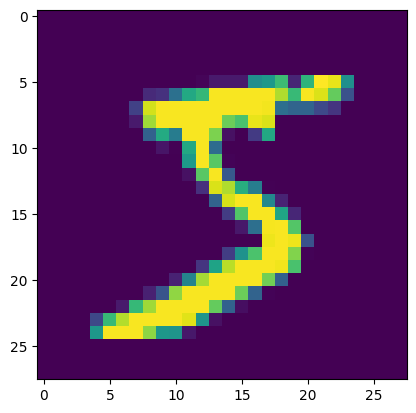

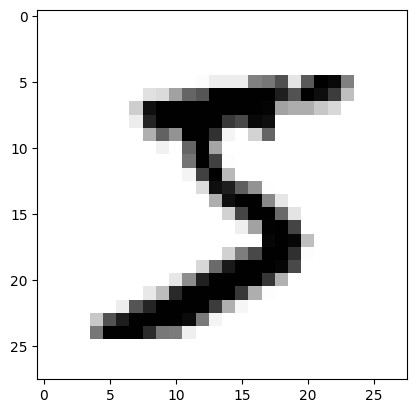

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

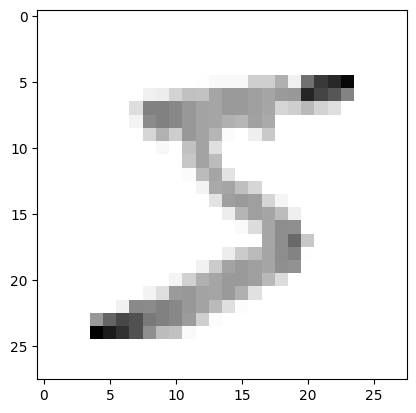

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(len(x_trainr))

60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.7765 - loss: 0.6774 - val_accuracy: 0.9659 - val_loss: 0.1096
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9633 - loss: 0.1182 - val_accuracy: 0.9735 - val_loss: 0.0852
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 68s 52ms/step - accuracy: 0.9769 - loss: 0.0760 - val_accuracy: 0.9753 - val_loss: 0.0750
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9803 - loss: 0.0633 - val_accuracy: 0.9794 - val_loss: 0.0688
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9858 - loss: 0.0455 - val_accuracy: 0.9780 - val_loss: 0.0720


In [ ]:
test_loss,test_accuracy=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9748 - loss: 0.0801
0.06370724737644196
0.9800999760627747


In [ ]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
	f.write(tflite_model)

Saved artifact at '/tmp/tmpu0c309_1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138035141174736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035141174928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046141392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046141968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046141008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046143888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046142544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046142736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046144848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046145424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138035046145232

In [ ]:
!pip install numpy==1.26.4

In [ ]:
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [ ]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

Prediction: 7
Confidence: 0.99994683


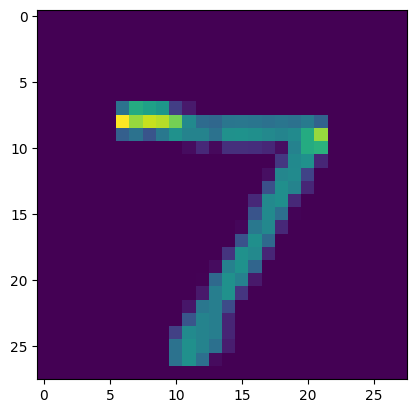

In [ ]:
import numpy as np
plt.imshow(x_testr[0])
input_data = x_testr[0].astype(np.float32)
input_data = np.expand_dims(input_data, axis=0) # Add batch dimension
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_index)
pred = output_data.argmax()
print("Prediction:", pred);
print("Confidence:", output_data[0][pred]); # Access the output correctly with batch dimension